<IPython.core.display.Javascript object>


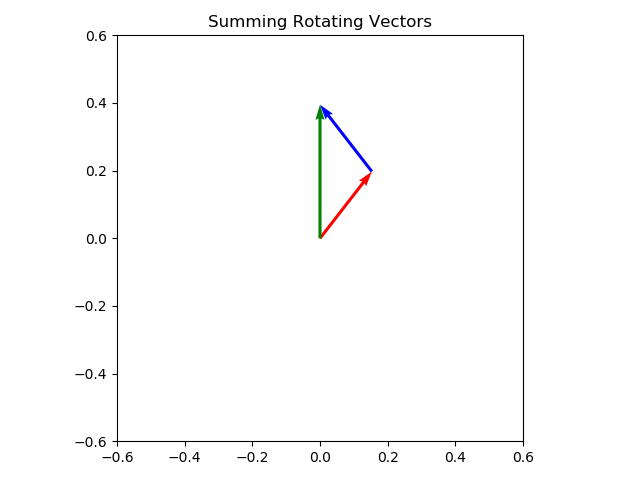

In [89]:
# Code seed from ali_m https://stackoverflow.com/a/19338495
# Final version is heavily modified

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook


Offset = np.pi/2   #angular offset in radians
Mag = 0.5          #Vector magnitude
Rate = 0.1         #Rotation rate in terms of radians per update

X1 = Mag * np.cos(Offset) #Defines starting x coordinate
Y1 = Mag * np.sin(Offset) #ditto y

fig, ax = plt.subplots(1,1)
Q = ax.quiver(0, 0, X1, Y1, color='r',units='x',scale=1/Mag)   
R = ax.quiver(X1, Y1, 2*X1, 2*Y1, color='b',units='x',scale=1/Mag)
S = ax.quiver(0, 0, 2*X1, 2*Y1, color='g',units='x',scale=1/Mag)
# quivers are basically vectors
# the first four arguments are the x,y coordinates of the start 
# and the x,y coordinates of the end
# scale = 1/Mag ensures that they show up as the size we'd expect.  Yes, smaller scale numbers means longer vectors.


ax.set_xlim(-1.2*Mag, 1.2*Mag)
ax.set_ylim(-1.2*Mag, 1.2*Mag)
ax.set_aspect('equal')
ax.set_title('Summing Rotating Vectors')

def update_quiver(num, Q, R,S):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    X1 = Mag*np.cos(num*Rate + Offset)
    Y1 = Mag*np.sin(num*Rate + Offset)
        #red vector rotates clockwise
    
    X2 = Mag*np.cos(-1*num*Rate + Offset)
    Y2 = Mag*np.sin(-1*num*Rate + Offset)
        #blue vector rotates counterclockwise
    

    Q.set_UVC(X1,Y1)
        #red vector has the end coordinates updated
    R.set_UVC(X2,Y2)
        #blue vector has the end coordinates updated
    R.set_offsets([Mag*X1,Mag*Y1])
        #blue vector is moved to the tip of the red vector
    S.set_UVC(X1+X2,Y1+Y2)
        #gree vector is the sum of the other two
    return Q,R,S


anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, R,S),interval=50)
fig.tight_layout()
plt.show()